How health gets affected due to various emmisions

#### Motivation for the study/analysis
Wanted to see how emission in the air affected other health indicators. Obviously bad air quality means lower quality of life, but wanted to know how and on what magnitude does air quality affect the health indicators

///My motivation for this analysis was to see how air quality affects our health by measuring the significance it has on various indicators(eg: birth rate, fertility rate, life expectancy, etc). The idea was to figure out the best indicator among multiple emissions: emissions of CO2, Nitrous oxide, methane, SF6 gas, HFC gas, PFC gas, other greenhouse gas; then to 
We obviously think bad air quality means lower quality of life, but I wanted to find out and present the magnitude at which air quality affect the various indicators for health. 


#### Part 1
Which specific emission has the highest correlation with all the other tests. 
Do we see individual correlations or do we take an average of all the correlations and find the average and chose the one with the highest value?
1. Check correlation for CO2 emission, Nitrous oxide emission, methane emissions, other greenhouse gas emissions, SF6 gas emissions, HFC gas emissions, PFC gas emissions, 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)

#### Part 2
Post finding the best comparision indicator, lets compare it with all the factors. Obtain data visually(find out which is the best type of plot to present the data)
2. CO2 emissions(per capita or kt) vs Birth rate, mortality rate(infant and under 5), fertility rate, life expectancy, population growth, prevalence of stunting/underweight, low birthweight babies
But can per capita be used to compare? kt represents total CO2 emissions, maybe a better indicator for comparision.

#### Part 3
Our conclusion should be if the emissions positively/negatively affect all the health indicators as a whiole. Or we can present the data with multiple conclusions that the emissions afect positively/negatively the health indicators individually.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Steps

1. Reading and Characterizing the Data (ACQUIRE)
2. Exploration (PREPARE)
3. Cleaning and Filtering the Data for our requirements (PREPARE)
4. Analysis (ANALYZE)
5. Results (REPORT)

## I. Characterizing the data (ACQUIRE)
Code below is to read the data file.

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')

Code below is to see the number of rows and columns in the data.

In [3]:
data.shape

(5656458, 6)

Code below is to see a sample of the data.

In [4]:
data.head()
#data.tail()

CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06

Before we start exploring the data, we want a clearer picture of the data. Hence we ask a few questions.
#### Q1. How many unique indicators do we have?

Code below is to find out the length of the indicators.

In [5]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

#### Q2. How many years of data do we have ?
Code below is to find out number of years.

In [6]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)
#years

56

#### Q3. What is the range of years?
Code below is to find out the range of years.

In [7]:
print(min(years)," to ",max(years))

1960  to  2015


Now we have understood the basic characteristics of the data.

## II. Exploration (PREPARE)

Code below is to display all the indicators in order to explore the indicators, and to figure out what are the best metrics to measure the `effects of quality of air` on `the quality of life`. 

In [8]:
indicators

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

#### Air Quality Indicators chosen are:

1. PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)

2. PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)

3. CO2 emissions (kt)

4. CO2 emissions (metric tons per capita)

5. Nitrous oxide emissions (thousand metric tons of CO2 equivalent)

6. Methane emissions (kt of CO2 equivalent)

7. SF6 gas emissions (thousand metric tons of CO2 equivalent)

8. HFC gas emissions (thousand metric tons of CO2 equivalent)

9. PFC gas emissions (thousand metric tons of CO2 equivalent)

10. Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)

#### Health Indicators chosen are:

1. Birth rate, crude (per 1,000 people)

2. Mortality rate, infant (per 1,000 live births)

3. Fertility rate, total (births per woman)

4. Life expectancy at birth, total (years)

5. Population growth (annual %)

6. Prevalence of stunting, height for age (% of children under 5)

7. Low-birthweight babies (% of births)

## III. Cleaning and Filtering the Data for our requirements (PREPARE)

Code below is to create a mask for `air quality indicators`.

In [9]:
indicator1 = 'PM2.5 air pollution, mean annual exposure \(micrograms'
indicator2 = 'PM2.5 air pollution, population exposed to '
indicator3 = 'CO2 emissions \(kt'
indicator4 = 'CO2 emissions \(metric'
indicator5 = 'Nitrous oxide emissions \(thousand'
indicator6 = 'Methane emissions \(kt of CO2'
indicator7 = 'SF6 gas emissions \(thousand'
indicator8 = 'HFC gas emissions \(thousand'
indicator9 = 'PFC gas emissions \(thousand'
indicator10 = 'Other greenhouse gas emissions, HFC'

mask1 = data['IndicatorName'].str.contains(indicator1)
mask2 = data['IndicatorName'].str.contains(indicator2)
mask3 = data['IndicatorName'].str.contains(indicator3)
mask4 = data['IndicatorName'].str.contains(indicator4)
mask5 = data['IndicatorName'].str.contains(indicator5)
mask6 = data['IndicatorName'].str.contains(indicator6)
mask7 = data['IndicatorName'].str.contains(indicator7)
mask8 = data['IndicatorName'].str.contains(indicator8)
mask9 = data['IndicatorName'].str.contains(indicator9) 
mask10 = data['IndicatorName'].str.contains(indicator10)

Code below is to create a mask for `health indicators`.

In [10]:
h_indicator1 = 'Birth rate, crude \('
h_indicator2 = 'Mortality rate, infant \(per'
h_indicator3 = 'Fertility rate, total \('
h_indicator4 = 'Life expectancy at birth, t'
h_indicator5 = 'Population growth \(a'
h_indicator6 = 'Prevalence of stunting, height for age \('
h_indicator7 = 'Low-birthweight babies \('

h_mask1 = data['IndicatorName'].str.contains(h_indicator1)
h_mask2 = data['IndicatorName'].str.contains(h_indicator2)
h_mask3 = data['IndicatorName'].str.contains(h_indicator3)
h_mask4 = data['IndicatorName'].str.contains(h_indicator4)
h_mask5 = data['IndicatorName'].str.contains(h_indicator5)
h_mask6 = data['IndicatorName'].str.contains(h_indicator6)
h_mask7 = data['IndicatorName'].str.contains(h_indicator7)

Code below is to create a mask to filter out data for a specific country. For the analysis, I have chosen `The USA`.

In [11]:
country = 'USA'
country_mask = data['CountryCode'].str.contains(country)

Code below is to create individual dataframes for the chosen indicators for both `air quality` and `health` for a specific country.

In [12]:
df1 = data[mask1 & country_mask].copy()
df2 = data[mask2 & country_mask].copy()
df3 = data[mask3 & country_mask].copy()
df4 = data[mask4 & country_mask].copy()
df5 = data[mask5 & country_mask].copy()
df6 = data[mask6 & country_mask].copy()
df7 = data[mask7 & country_mask].copy()
df8 = data[mask8 & country_mask].copy()
df9 = data[mask9 & country_mask].copy()
df10 = data[mask10 & country_mask].copy()

hdf1 = data[h_mask1 & country_mask].copy()
hdf2 = data[h_mask2 & country_mask].copy()
hdf3 = data[h_mask3 & country_mask].copy()
hdf4 = data[h_mask4 & country_mask].copy()
hdf5 = data[h_mask5 & country_mask].copy()
hdf6 = data[h_mask6 & country_mask].copy()
hdf7 = data[h_mask7 & country_mask].copy()

Now we want to `delete`: `1. Columns not required for analysis`, `2. Rows containing Nil value`, and then `reindex` the rows for lighter operations and quicker run times.

Code below is to execute 3 operations mentioned above.

In [13]:
df1.drop(df1.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df1.dropna(subset=['Value'])
df1.reset_index(drop = True, inplace=True)

df2.drop(df2.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df2.dropna(subset=['Value'])
df2.reset_index(drop = True, inplace=True)

df3.drop(df3.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df3.dropna(subset=['Value'])
df3.reset_index(drop = True, inplace=True)

df4.drop(df4.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df4.dropna(subset=['Value'])
df4.reset_index(drop = True, inplace=True)

df5.drop(df5.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df5.dropna(subset=['Value'])
df5.reset_index(drop = True, inplace=True)

df6.drop(df6.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df6.dropna(subset=['Value'])
df6.reset_index(drop = True, inplace=True)

df7.drop(df7.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df7.dropna(subset=['Value'])
df7.reset_index(drop = True, inplace=True)

df8.drop(df8.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df8.dropna(subset=['Value'])
df8.reset_index(drop = True, inplace=True)

df9.drop(df9.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df9.dropna(subset=['Value'])
df9.reset_index(drop = True, inplace=True)

df10.drop(df10.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
df10.dropna(subset=['Value'])
df10.reset_index(drop = True, inplace=True)


hdf1.drop(hdf1.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
hdf1.dropna(subset=['Value'])
hdf1.reset_index(drop = True, inplace=True)

hdf2.drop(hdf2.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
hdf2.dropna(subset=['Value'])
hdf2.reset_index(drop = True, inplace=True)

hdf3.drop(hdf3.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
hdf3.dropna(subset=['Value'])
hdf3.reset_index(drop = True, inplace=True)

hdf4.drop(hdf4.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
hdf4.dropna(subset=['Value'])
hdf4.reset_index(drop = True, inplace=True)

hdf5.drop(hdf5.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
hdf5.dropna(subset=['Value'])
hdf5.reset_index(drop = True, inplace=True)

hdf6.drop(hdf6.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
hdf6.dropna(subset=['Value'])
hdf6.reset_index(drop = True, inplace=True)

hdf7.drop(hdf7.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
hdf7.dropna(subset=['Value'])
hdf7.reset_index(drop = True, inplace=True)

Code below is to individually check if the above operation worked.

In [14]:
#add/remove

#d10
hdf7

Year  Value
0  2002    8.0
1  2010    8.1

## IV. Analysis (ANALYZE)

Code below is to individually examine examine the final dataframes we will use to perform the analysis. We want to check if we have the required data for 54 years.

`df` Range  : `df1` to `df10`

`hdf` Range : `hdf1` to `hdf7`

In [15]:
#Change the dataframe number according to the range

#df10
#hdf7

#df10.shape
hdf7.shape

(2, 2)

Post examination of the dataframes individually, We have found that:

#### No of years of data available for:

* df1 : 7
* df2 : 7
* df3 : 52
* df4 : 52
* df5 : 5
* df6 : 5
* df7 : 5
* df8 : 5
* df9 : 5
* df10 : 5


* hdf1 : 54
* hdf2 : 56
* hdf3 : 54
* hdf4 : 54
* hdf5 : 55
* hdf6 : 7
* hdf7 : 2

#### Conclusion
1. We `do not` have sufficient data for any `air quality` indicators `except` for `CO2 emissions`.
2. We `do not` have sufficient data for `health indicators` for `paevelance of stunting` and `low-birth weight babies`.

Due to data constraints, We have chosen `CO2 Emissions(kt)` as the only indicator for air quality,

And we have chosen the following 5 indicators for health quality.
1. `Birth rate, crude (per 1,000 people)`
2. `Mortality rate, infant (per 1,000 live births)`
3. `Fertility rate, total (births per woman)`
4. `Life expectancy at birth, total (years)`
5. `Population growth (annual %)`

The analysis that will be performed is the
`Effect of CO2 emissions(kt)` on

1. `Birth rate, crude (per 1,000 people)`
2. `Mortality rate, infant (per 1,000 live births)`
3. `Fertility rate, total (births per woman)`
4. `Life expectancy at birth, total (years)`
5. `Population growth (annual %)`

Code below is to check if the data present have the same timeline.

In [16]:
print("CO2 Emissions Min Year = ", df3['Year'].min(), " Max: ", df3['Year'].max())
print("Birth Rate Min Year = ", hdf1['Year'].min(), " Max: ", hdf1['Year'].max())
print("Mortality Rate Min Year = ", hdf2['Year'].min(), " Max: ", hdf2['Year'].max())
print("Fertility Min Year = ", hdf3['Year'].min(), " Max: ", hdf3['Year'].max())
print("Life Expectancy at birth, total Min Year = ", hdf4['Year'].min(), " Max: ", hdf4['Year'].max())
print("Population Growth Min Year = ", hdf5['Year'].min(), " Max: ", hdf5['Year'].max())

CO2 Emissions Min Year =  1960  Max:  2011
Birth Rate Min Year =  1960  Max:  2013
Mortality Rate Min Year =  1960  Max:  2015
Fertility Min Year =  1960  Max:  2013
Life Expectancy at birth, total Min Year =  1960  Max:  2013
Population Growth Min Year =  1960  Max:  2014


Since the `min year` in `common` is the `same` for all indicators and the `max year` in `common` for all indicators is `2011`, we will filter the data and and get data from `1960 till 2011`.

Code below is to filter the data from `1960 till 2011`.

In [17]:
df3 = df3[df3['Year'] < 2012]

hdf1 = hdf1[hdf1['Year'] < 2012]
hdf2 = hdf2[hdf2['Year'] < 2012]
hdf3 = hdf3[hdf3['Year'] < 2012]
hdf4 = hdf4[hdf4['Year'] < 2012]
hdf5 = hdf5[hdf5['Year'] < 2012]

Code below is to check if our filter for the `Years` column worked.

In [18]:
print("CO2 Emissions Min Year = ", df3['Year'].min(), " Max: ", df3['Year'].max())
print("Birth Rate Min Year = ", hdf1['Year'].min(), " Max: ", hdf1['Year'].max())
print("Mortality Rate Min Year = ", hdf2['Year'].min(), " Max: ", hdf2['Year'].max())
print("Fertility Min Year = ", hdf3['Year'].min(), " Max: ", hdf3['Year'].max())
print("Life Expectancy at birth, total Min Year = ", hdf4['Year'].min(), " Max: ", hdf4['Year'].max())
print("Population Growth Min Year = ", hdf5['Year'].min(), " Max: ", hdf5['Year'].max())

CO2 Emissions Min Year =  1960  Max:  2011
Birth Rate Min Year =  1960  Max:  2011
Mortality Rate Min Year =  1960  Max:  2011
Fertility Min Year =  1960  Max:  2011
Life Expectancy at birth, total Min Year =  1960  Max:  2011
Population Growth Min Year =  1960  Max:  2011


We can observe that the filter has worked and now, all the indicators have the same timeline.

Code below is to see the trend for `CO2 Emissions(kt)` over the years through a line plot.

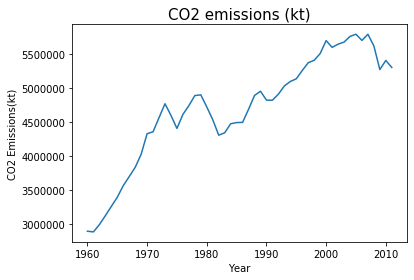

In [40]:
# switch to a line plot
plt.plot(df3['Year'].values, df3['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('CO2 Emissions(kt)')
axis.set_xlabel(x ,fontsize=12)
axis.set_ylabel(y ,fontsize=12)

#label the figure
plt.title('CO2 emissions (kt)', fontsize=15)

plt.savefig('CO2 Emissions(kt).png', dpi=150, bbox_inches='tight')
plt.show()

We can observe that the `general trend` for `CO2 emissions` is `increasing`, but has shown `degrowth` towards the `end`.

Code below is to create a single dataframe with the values of the health indicators for lighter operation and quicker runtimes.

In [20]:
correl_hdfs = pd.concat([hdf1, hdf2, hdf3, hdf4, hdf5], axis=1, join='inner')
correl_hdfs.drop(correl_hdfs.columns[[2, 4, 6, 8]], axis = 1, inplace = True)
correl_hdfs.columns = ['hdf1', 'hdf2', 'hdf3', 'hdf4', 'hdf5']

Code below is to check if the above operation worked.

In [21]:
correl_hdfs

hdf1  hdf2    hdf3       hdf4      hdf5
0   23.7  25.9  3.6540  69.770732  1.701993
1   23.3  25.4  3.6200  70.270732  1.657730
2   22.4  24.9  3.4610  70.119512  1.537997
3   21.7  24.4  3.3190  69.917073  1.439165
4   21.1  23.8  3.1900  70.165854  1.389046
5   19.4  23.3  2.9130  70.214634  1.250172
6   18.4  22.7  2.7210  70.212195  1.154893
7   17.8  22.0  2.5580  70.560976  1.088881
8   17.6  21.3  2.4640  69.951220  0.998461
9   17.9  20.6  2.4560  70.507317  0.977243
10  18.4  19.9  2.4800  70.807317  1.165003
11  17.2  19.1  2.2660  71.107317  1.264334
12  15.6  18.3  2.0100  71.156098  1.070523
13  14.8  17.5  1.8790  71.356098  0.954477
14  14.8  16.7  1.8350  71.956098  0.913660
15  14.6  16.0  1.7740  72.604878  0.985986
16  14.6  15.2  1.7380  72.856098  0.950220
17  15.1  14.5  1.7900  73.256098  1.005772
18  15.0  13.8  1.7600  73.356098  1.059573
19  15.6  13.2  1.8080  73.804878  1.103577
20  15.9  12.6  1.8395  73.658537  0.959590
21  15.8  12.1  1.8120  74.007317  0.981415
22  15.9  11.7  1.8275  74.360976  0.953318
23  15.6  11.2  1.7990  74.463415  0.914379
24  15.6  10.9  1.8065  74.563415  0.865817
25  15.8  10.6  1.8440  74.563415  0.886129
26  15.6  10.4  1.8375  74.614634  0.924164
27  15.7  10.2  1.8720  74.765854  0.893829
28  16.0  10.0  1.9340  74.765854  0.907999
29  16.4   9.7  2.0140  75.017073  0.944406
30  16.7   9.4  2.0810  75.214634  1.129651
31  16.2   9.1  2.0625  75.365854  1.336261
32  15.8   8.8  2.0460  75.642195  1.386886
33  15.4   8.5  2.0195  75.419512  1.318680
34  15.0   8.2  2.0015  75.574390  1.226296
35  14.6   8.0  1.9780  75.621951  1.190787
36  14.4   7.7  1.9760  75.996585  1.163412
37  14.2   7.5  1.9710  76.429268  1.203960
38  14.3   7.3  1.9990  76.580488  1.165715
39  14.2   7.2  2.0075  76.582927  1.148340
40  14.4   7.1  2.0560  76.636585  1.112769
41  14.1   7.0  2.0305  76.736585  0.989741
42  14.0   6.9  2.0205  76.836585  0.927797
43  14.1   6.8  2.0475  76.987805  0.859482
44  14.0   6.9  2.0515  77.339024  0.925484
45  14.0   6.8  2.0570  77.339024  0.921713
46  14.3   6.7  2.1080  77.587805  0.964254
47  14.3   6.6  2.1200  77.839024  0.951055
48  14.0   6.5  2.0720  77.939024  0.945865
49  13.5   6.4  2.0020  78.090244  0.876651
50  13.0   6.3  1.9310  78.541463  0.836054
51  12.7   6.1  1.8945  78.641463  0.764678

We will now check the correlation between the values for the 5 health indicators to see if we can omit indicators having a high positive correlation value with all the other indicators.

Code below is to calculate correlation for columns within a dataframe.

In [22]:
correl_hdfs.corr(method ='pearson')

hdf1      hdf2      hdf3      hdf4      hdf5
hdf1  1.000000  0.861943  0.909993 -0.798085  0.767149
hdf2  0.861943  1.000000  0.749158 -0.969850  0.555799
hdf3  0.909993  0.749158  1.000000 -0.612636  0.770800
hdf4 -0.798085 -0.969850 -0.612636  1.000000 -0.500489
hdf5  0.767149  0.555799  0.770800 -0.500489  1.000000

We can observe that none of the columns have a significant positive correlation with all indicators. Hence we will take into consideration all of the chosen indicators.

## V. Results (REPORT)
#### 1. Scatter Plot of CO2 Emissions(kt) vs Birth rate, crude (per 1,000 people)

Code below is to create a scatter plot and to save it as an image file to use in the presentation.

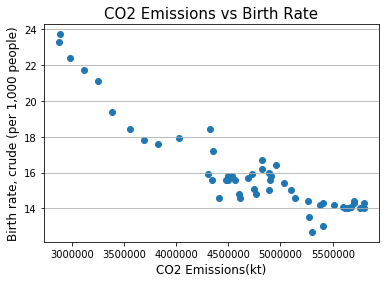

The correlation between CO2 Emissions and Birth Rate is: -0.91


In [33]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

x = 'CO2 Emissions(kt)'
y = 'Birth rate, crude (per 1,000 people)'

a = 'CO2 Emissions'
b = 'Birth Rate'
axis.yaxis.grid(True)
axis.set_title(a+' vs '+b,fontsize=15)
axis.set_xlabel(x ,fontsize=12)
axis.set_ylabel(y ,fontsize=12)

X = df3['Value'].values
Y = hdf1['Value'].values

axis.scatter(X, Y)

plt.savefig('CO2 vs Birth Rate.png', dpi=150, bbox_inches='tight')
plt.show()

column_1 = df3["Value"]
column_2 = hdf1["Value"]
correlation = column_1.corr(column_2)

print('The correlation between '+a+' and '+b+' is: '+str(round(correlation, 3)))

#### 2. Scatter Plot of CO2 Emissions(kt) vs Mortality rate, infant (per 1,000 live births)

Code below is to create a scatter plot and to save it as an image file to use in the presentation.

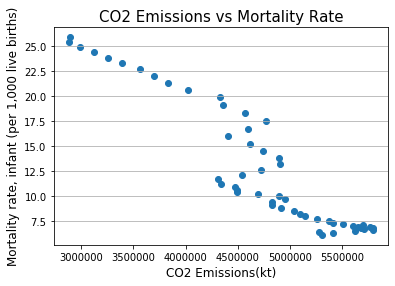

The correlation between CO2 Emissions and Mortality Rate is: -0.93


In [34]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

x = 'CO2 Emissions(kt)'
y = 'Mortality rate, infant (per 1,000 live births)'

a = 'CO2 Emissions'
b = 'Mortality Rate'
axis.yaxis.grid(True)
axis.set_title(a+' vs '+b,fontsize=15)
axis.set_xlabel(x ,fontsize=12)
axis.set_ylabel(y ,fontsize=12)

X = df3['Value'].values
Y = hdf2['Value'].values

axis.scatter(X, Y)

plt.savefig('CO2 vs Mortality Rate.png', dpi=150, bbox_inches='tight')
plt.show()

column_1 = df3["Value"]
column_2 = hdf2["Value"]
correlation = column_1.corr(column_2)

print('The correlation between '+a+' and '+b+' is: '+str(round(correlation, 3)))

#### 3. Scatter Plot of CO2 Emissions(kt) vs Fertility rate, total (births per woman)

Code below is to create a scatter plot and to save it as an image file to use in the presentation.

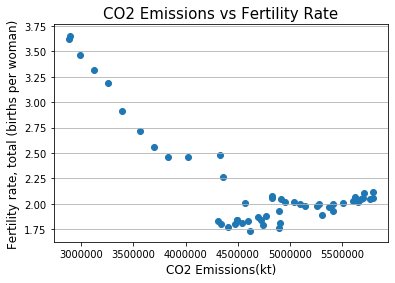

The correlation between CO2 Emissions and Fertility Rate is: -0.752


In [35]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

x = 'CO2 Emissions(kt)'
y = 'Fertility rate, total (births per woman)'

a = 'CO2 Emissions'
b = 'Fertility Rate'
axis.yaxis.grid(True)
axis.set_title(a+' vs '+b,fontsize=15)
axis.set_xlabel(x ,fontsize=12)
axis.set_ylabel(y ,fontsize=12)

X = df3['Value'].values
Y = hdf3['Value'].values

axis.scatter(X, Y)

plt.savefig('CO2 vs Fertility Rate.png', dpi=150, bbox_inches='tight')
plt.show()

column_1 = df3["Value"]
column_2 = hdf3["Value"]
correlation = column_1.corr(column_2)

print('The correlation between '+a+' and '+b+' is: '+str(round(correlation, 3)))

#### 4. Scatter Plot of CO2 Emissions(kt) vs Life expectancy at birth, total (years)

Code below is to create a scatter plot and to save it as an image file to use in the presentation.

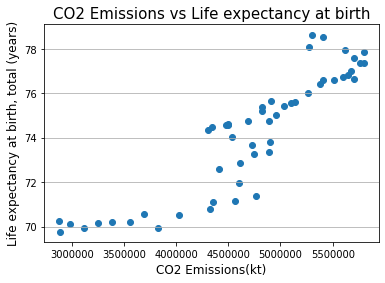

The correlation between CO2 Emissions and Life expectancy at birth is: 0.899


In [36]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

x = 'CO2 Emissions(kt)'
y = 'Life expectancy at birth, total (years)'

a = 'CO2 Emissions'
b = 'Life expectancy at birth'
axis.yaxis.grid(True)
axis.set_title(a+' vs '+b,fontsize=15)
axis.set_xlabel(x ,fontsize=12)
axis.set_ylabel(y ,fontsize=12)

X = df3['Value'].values
Y = hdf4['Value'].values

axis.scatter(X, Y)

plt.savefig('CO2 vs Life Expectancy at birth.png', dpi=150, bbox_inches='tight')
plt.show()

column_1 = df3["Value"]
column_2 = hdf4["Value"]
correlation = column_1.corr(column_2)

print('The correlation between '+a+' and '+b+' is: '+str(round(correlation, 3)))

#### 5. Scatter Plot of CO2 Emissions(kt) vs Population growth (annual %)

Code below is to create a scatter plot and to save it as an image file to use in the presentation.

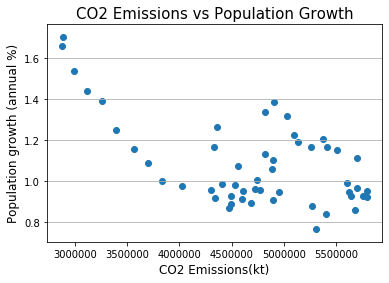

The correlation between CO2 Emissions and Population Growth is: -0.591


In [31]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

x = 'CO2 Emissions(kt)'
y = 'Population growth (annual %)'

a = 'CO2 Emissions'
b = 'Population Growth'
axis.yaxis.grid(True)
axis.set_title(a+' vs '+b,fontsize=15)
axis.set_xlabel(x ,fontsize=12)
axis.set_ylabel(y ,fontsize=12)

X = df3['Value'].values
Y = hdf5['Value'].values

axis.scatter(X, Y)
plt.savefig('CO2 vs Population Growth.png', dpi=150, bbox_inches='tight')
plt.show()

column_1 = df3["Value"]
column_2 = hdf5["Value"]
correlation = column_1.corr(column_2)

print('The correlation between '+a+' and '+b+' is: '+str(round(correlation, 3)))

### Conclusion

We can finally conclude by saying that growing `CO2 Emissions` has a
1. `very strong negative impact` on `Birth rate, crude (per 1,000 people)` 
2. `negligible impact` on `Mortality rate, infant (per 1,000 live births)`
3. `strong negative impact` on `Fertility rate, total (births per woman)`
4. `negligible impact` on `Life expectancy at birth, total (years)`
5. `mild negative impact` on `Population growth (annual %)`